### 1. Data Preprocessing

In [68]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.BRCA.sampleMap_BRCA_clinicalMatrix  TCGA.SARC.sampleMap_HiSeqV2_PANCAN
TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	 TCGA.SARC.sampleMap_SARC_clinicalMatrix


In [69]:
!pip install sparse_lmm

In [70]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.SARC.sampleMap_SARC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.SARC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [71]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_SARC_miRNA_HiSeq,_GENOMIC_ID_TCGA_SARC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_SARC_mutation_broad_gene,_GENOMIC_ID_TCGA_SARC_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_SARC_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/SARC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_SARC_exp_HiSeqV2,_GENOMIC_ID_TCGA_SARC_RPPA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,TCGA-3B-A9HI,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Progressive Disease,68,TCGA-3B-A9HI-F69153,...,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,TCGA-3B-A9HI-01A-11D-A387-09,TCGA-3B-A9HI-01A-11D-A387-09,TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,4d2b4bc6-45e1-49c0-9bcb-5e711cad5ae0,5E92FA0B-4BB9-4CA9-AB6A-FB9D6A7E3A78
TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,Complete Response,68,TCGA-3B-A9HJ-F69261,...,fba18017-31ec-45f8-9d9e-43b0efa14347,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,fba18017-31ec-45f8-9d9e-43b0efa14347,TCGA-3B-A9HJ-01A-11D-A387-09,TCGA-3B-A9HJ-01A-11D-A387-09,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,fba18017-31ec-45f8-9d9e-43b0efa14347,C181E222-C4EE-496D-914A-019ADB88CEF1
TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,TCGA-3B-A9HL,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,67,NaN,...,44f2c257-7463-4120-a509-217337d8cd45,TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,44f2c257-7463-4120-a509-217337d8cd45,TCGA-3B-A9HL-01A-11D-A387-09,TCGA-3B-A9HL-01A-11D-A387-09,TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,44f2c257-7463-4120-a509-217337d8cd45,EE323E82-A782-4688-858D-509A77EB8FF6
TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,TCGA-3B-A9HO,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Complete Response,75,TCGA-3B-A9HO-F69263,...,9097b71f-9b67-4c9b-acdb-2f399a071ae6,TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,9097b71f-9b67-4c9b-acdb-2f399a071ae6,TCGA-3B-A9HO-01A-11D-A387-09,TCGA-3B-A9HO-01A-11D-A387-09,TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,9097b71f-9b67-4c9b-acdb-2f399a071ae6,NaN
TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,TCGA-3B-A9HP,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,57,NaN,...,94a77467-94d0-4b95-8b99-9ff79227b690,TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,94a77467-94d0-4b95-8b99-9ff79227b690,TCGA-3B-A9HP-01A-11D-A387-09,TCGA-3B-A9HP-01A-11D-A387-09,TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,94a77467-94d0-4b95-8b99-9ff79227b690,NaN


In [72]:
gene_data.head()

,TCGA-FX-A48G-01,TCGA-HB-A3YV-01,TCGA-DX-AATS-01,TCGA-FX-A3NJ-01,TCGA-DX-A1L2-01,TCGA-3B-A9HX-01,TCGA-WK-A8XX-01,TCGA-DX-A3LS-01,TCGA-DX-A3UD-01,TCGA-3B-A9I0-01,...,TCGA-DX-A3LT-01,TCGA-DX-A48R-01,TCGA-DX-AB35-01,TCGA-DX-A48J-01,TCGA-DX-AB37-01,TCGA-DX-A8BX-01,TCGA-K1-A6RT-01,TCGA-Z4-A9VC-01,TCGA-HS-A5NA-01,TCGA-FX-A3RE-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-2.275792,0.650708,0.337808,1.565708,0.848208,-0.143992,1.922608,-0.508792,2.669308,1.967408,...,0.445208,1.088508,1.097308,2.094108,0.503608,-0.010292,1.260308,-1.042392,-0.257392,-0.976392
HIF3A,2.965374,6.638274,0.536774,3.164474,3.230874,2.238474,-0.248226,0.973474,0.421674,0.447674,...,0.264374,6.293274,4.884874,4.266974,1.071074,0.128874,-0.363126,2.944374,1.735474,2.512274
RNF17,-0.531035,-0.531035,1.014765,-0.531035,-0.531035,-0.531035,1.215565,-0.531035,-0.531035,2.175565,...,-0.531035,-0.133135,-0.531035,-0.531035,-0.531035,-0.531035,3.331065,-0.531035,-0.531035,-0.531035
RNF10,0.137328,0.034528,1.062828,0.236428,-0.514772,-0.109972,0.126528,-0.248872,-0.356272,-0.156672,...,0.003628,-0.749472,0.370528,-0.031872,0.027928,1.899128,0.825728,-0.038972,-0.128472,0.087928
RNF11,-2.430278,1.454722,0.266322,0.942822,0.295222,0.323222,0.131922,0.529222,-0.895478,-0.450778,...,0.187822,0.520022,-0.256678,0.711222,-0.440078,-0.169878,0.627922,0.063822,0.089222,-0.506778


In [73]:
gene_fullname = 'SARC gene'
gene = 'sarc'
condition = 'sex'
condition_col = 'gender'
trait = 'Sarcoma'

col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 105 features, and the gene dataset includes 20530 genes


In [74]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,TCGA-3B-A9HI-01,TCGA-3B-A9HI,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Progressive Disease,68,TCGA-3B-A9HI-F69153,...,0.619022,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388
TCGA-3B-A9HJ-01,TCGA-3B-A9HJ-01,TCGA-3B-A9HJ,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,Complete Response,68,TCGA-3B-A9HJ-F69261,...,-0.748878,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688
TCGA-3B-A9HL-01,TCGA-3B-A9HL-01,TCGA-3B-A9HL,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,67,NaN,...,-0.748878,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388
TCGA-3B-A9HO-01,TCGA-3B-A9HO-01,TCGA-3B-A9HO,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NO,NO,Complete Response,75,TCGA-3B-A9HO-F69263,...,-0.748878,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688
TCGA-3B-A9HP-01,TCGA-3B-A9HP-01,TCGA-3B-A9HP,TCGA Sarcoma (SARC),sarcoma,"Soft tissue,Bone",NaN,NaN,NaN,57,NaN,...,0.830322,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912


In [86]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,gender,TMEM212,SNORD115-13,TCEB3B,SIPA1,CRTAM,EDA,OR6P1,CCDC116,CADPS2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Sarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,1,-0.621605,-0.088501,-0.526959,1.113486,1.407247,1.204228,-0.007055,0.993092,-0.571161,...,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388,1
TCGA-3B-A9HJ-01,1,-0.621605,-0.088501,0.137041,2.226286,3.801847,0.434228,-0.007055,0.613392,-0.452861,...,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688,1
TCGA-3B-A9HL-01,1,-0.084905,-0.088501,-0.526959,1.267886,-1.633953,3.086028,-0.007055,1.982192,-0.493961,...,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388,1
TCGA-3B-A9HO-01,1,-0.621605,-0.088501,-0.526959,2.084886,3.731347,1.619128,-0.007055,0.827092,0.359139,...,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688,1
TCGA-3B-A9HP-01,0,-0.621605,-0.088501,0.055141,0.826086,0.729247,1.108528,-0.007055,2.289692,0.614839,...,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912,1


In [87]:
merged_data['gender'] = merged_data['gender'].astype('category').cat.codes
merged_data.head()

,gender,TMEM212,SNORD115-13,TCEB3B,SIPA1,CRTAM,EDA,OR6P1,CCDC116,CADPS2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Sarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,1,-0.621605,-0.088501,-0.526959,1.113486,1.407247,1.204228,-0.007055,0.993092,-0.571161,...,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388,1
TCGA-3B-A9HJ-01,1,-0.621605,-0.088501,0.137041,2.226286,3.801847,0.434228,-0.007055,0.613392,-0.452861,...,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688,1
TCGA-3B-A9HL-01,1,-0.084905,-0.088501,-0.526959,1.267886,-1.633953,3.086028,-0.007055,1.982192,-0.493961,...,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388,1
TCGA-3B-A9HO-01,1,-0.621605,-0.088501,-0.526959,2.084886,3.731347,1.619128,-0.007055,0.827092,0.359139,...,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688,1
TCGA-3B-A9HP-01,0,-0.621605,-0.088501,0.055141,0.826086,0.729247,1.108528,-0.007055,2.289692,0.614839,...,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912,1


In [88]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,gender,TMEM212,SNORD115-13,TCEB3B,SIPA1,CRTAM,EDA,OR6P1,CCDC116,CADPS2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Sarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3B-A9HI-01,1,-0.621605,-0.088501,-0.526959,1.113486,1.407247,1.204228,-0.007055,0.993092,-0.571161,...,-1.587117,0.517667,-1.28139,0.205423,2.511014,4.467173,-0.609595,3.663367,0.239388,1
TCGA-3B-A9HJ-01,1,-0.621605,-0.088501,0.137041,2.226286,3.801847,0.434228,-0.007055,0.613392,-0.452861,...,0.584983,2.215767,-1.28139,-0.640877,1.061114,1.709973,0.438105,3.983567,0.170688,1
TCGA-3B-A9HL-01,1,-0.084905,-0.088501,-0.526959,1.267886,-1.633953,3.086028,-0.007055,1.982192,-0.493961,...,-1.587117,0.136367,-1.28139,0.424723,2.385714,3.864673,-0.689895,-2.077233,1.266388,1
TCGA-3B-A9HO-01,1,-0.621605,-0.088501,-0.526959,2.084886,3.731347,1.619128,-0.007055,0.827092,0.359139,...,-1.587117,2.677767,-1.28139,-0.087477,2.340514,2.666673,0.543905,0.975067,1.228688,1
TCGA-3B-A9HP-01,0,-0.621605,-0.088501,0.055141,0.826086,0.729247,1.108528,-0.007055,2.289692,0.614839,...,-0.007917,0.874467,-1.28139,0.821323,2.592814,3.088073,-0.251695,-0.026133,-0.257912,1


In [89]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

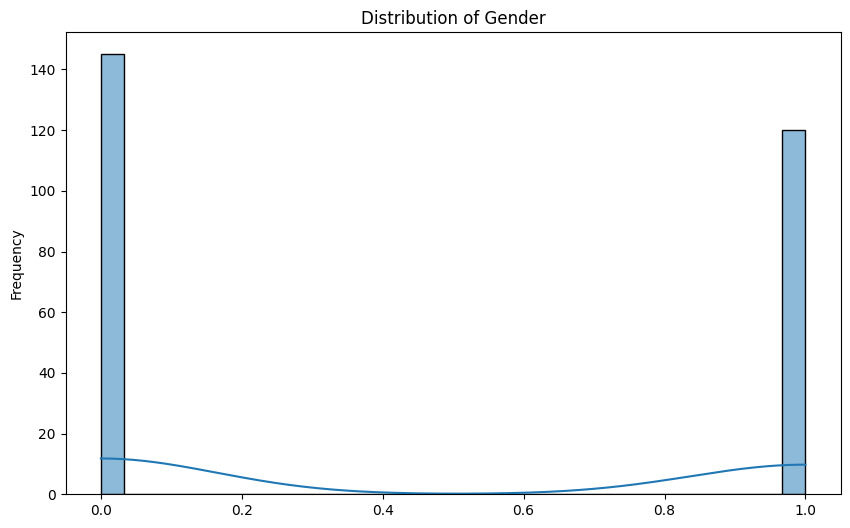

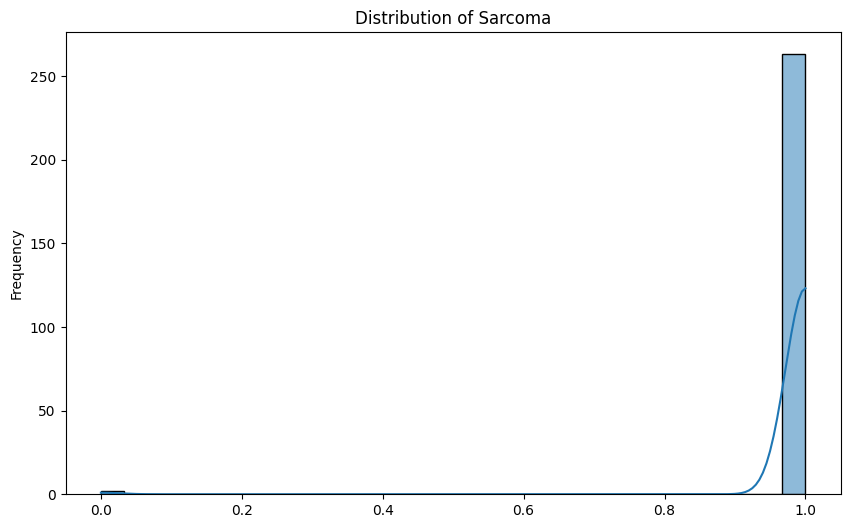

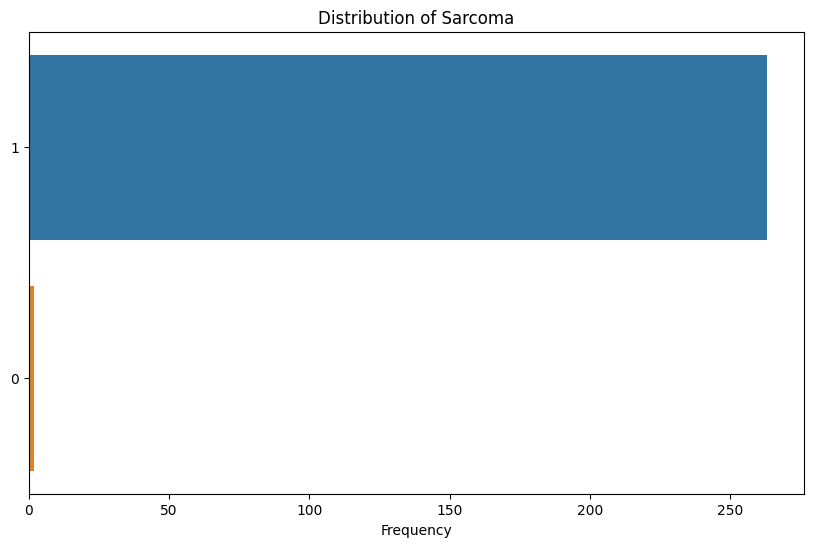

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

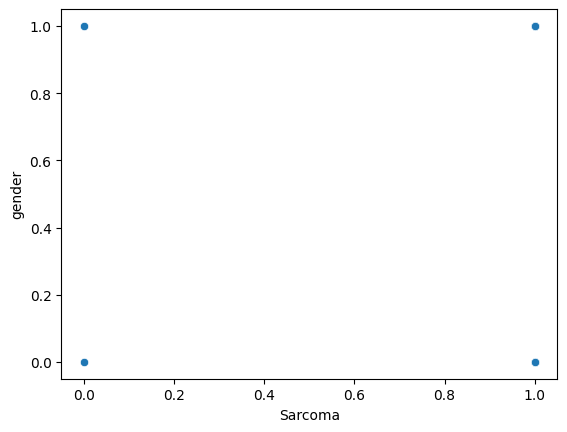

In [91]:
sns.scatterplot(data=merged_data, x='Sarcoma', y=condition_col)
plt.show()

### 3. Do regression & Cross Validation

In [92]:
import pandas as pd
from sparse_lmm import VariableSelection

data_array = merged_data.values

X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values


def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-92-0f20ab0f740b>:10: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9085083659665362


In [93]:
var_select = VariableSelection()

var_select.fit(X, y)

coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [97]:
import statsmodels.api as sm
x = merged_data["gender" ]
y = merged_data["Sarcoma"]
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                Sarcoma   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              214.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                    5.32e-36
Time:                        01:21:30   Log-Likelihood:                         -296.11
No. Observations:                 265   AIC:                                      594.2
Df Residuals:                     264   BIC:                                      597.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [99]:
gene_result = []
condition_result = []

for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))

condition_result.append((var,coef==0.9917,np.exp(-nlogp) == 0.000))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For sarc:
Sarcoma: Coefficient = 0.08654599955607335, p-value = 0.0

For sex:
Sarcoma: Coefficient = False, p-value = True



### 4. Discussion

In [100]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between SARC gene and Sarcoma when considering the influence of sex?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the SARC gene and Sarcoma when considering the influence of sex.

Alternative Hypothesis (H1): There is an association between the expression of the SARC gene and Sarcoma when considering the influence of sex.




In [101]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: Sarcoma
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: Sarcoma
Coefficient is zero, and it is not statistically significant (p-value >= 0.05).




In [102]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: Sarcoma
Conclusion: H1 is confirmed: There is an association between the expression of the Sarcoma and Sarcoma when considering the influence of sex.




